# Deep Learning in Medicine
## BMSC-GA 4493, BMIN-GA 3007
## Homework 3: Sequence Classification

Note 1: If you don't know how to run jupyter on the Prince cluster, here is another step-by-step guide here: 
<a href='https://docs.google.com/document/d/1HIdtzqJ6-RpsV0z2Gf5iXphNBTRca1kHZPlyqFxKpWs/edit?usp=sharing'> **Running Jupyter on the Cluster **</a>

Note 2: If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex
See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics">here</a>.


Submission instruction: Upload and Submit your final jupyter notebook file in newclasses.nyu.edu

Submission deadline: Tuesday April 10th 2018 (3pm, before class)



# Question 1: Literature Review for Sequence Classification: DeepBind (Total points 20 + 20 Bonus points)

Read this paper:

#### Babak Alipanahi1, Andrew Delong, Matthew T Weirauch & Brendan J Frey, *"Predicting the sequence specificities of DNA- and RNA-binding proteins by deep learning"* Nature Biotechnology, 2015  https://www.nature.com/articles/nbt.3300.pdf

We are interested in understanding the task, the methods that is proposed in this publication, technical aspects of the implementation, and possible future work.

**1.1) (5 points)** After you read the full article, go back to section **Training DeepBind and scoring sequences**. How do the authors define the **binding score, f(s)** on a given sequence? Write the formula here, and describe in your own words, in a few sentences, how the score is computed for each sequence (s)?


$f(s)=net_w(pool(rect_b(conv_m(s))))$

S is the sequence under consideration. Convolution operation is performed on S using convolution filter filter ( called as MOtif detector-with parameter M across the sequence). These filters are of size 4*M.

Later, on the covolution result, rectification operation is performed. Where the positions are isolated with good patern match by shifting response of motif detector $M_k$ by $b_k$. Also it clamps all the negetive values to zero.

On the output of rectification output, pooling is performed. Both the average and max pooling are peeformed ad max pooling is helpful in detecting longer motifs and average pooling helps in cummulative effect of smalled motifs.

These values are later fed into a non linear neural network with weights - W. This would produce the score $f(s)$

**1.2) (5 points)** What is the loss function that they are optimizing?

They are trying to optimize the negetive log likelihood. (Cross entropy loss) as this problem falls under classification

**1.3) (5 points)** What is the evaluation criteria based on which the authors do their cross validation? (Hint: Check Figure 2).

The evaluation criteria is mean Area Under Curve (AUC). The AUC for each epoch is taken and average is taken across 3 folds and one with higher AUC is choosen

**1.4) (5 points)** Are there some data augmentation/regularization that authors have used? What are some techniques that could have been used and wasn't? (Go back to Lecture 7 or Chapter 7 of your book for more info.)

They are using regularization techniques like drop out, weight decay, early stopping.

Just like cropping images while dealing with images, here we can take sub sequences of some length(hyper parameter) and add them to the train set. 

Also, just may be - as not sure how much sense does it make in medical domain. but one could try flipping few charecter here and there as the model becomes robust to any small misleading human errors.

**1.5) (Bonus maximum 20 points)**. What other architectures would you try? For each family of models, please do a literature search and see if a paper on that architecture for the task of DNA binding detection has been 

Since we are deeling with sequence data, remembering previous showed up chareter acts as crutial action. Hence, LSTMs should be used. Also CNN with connection from previous laters could be used (like RNN but not very deep)


# Question 2 - Literature Review for Sequence Labeling (20 points)

Read this paper: 


#### Mohammed AlQuraishi, "End-to-end differentiable learning of protein structure", 2018 bioRxiv 265231; doi: https://doi.org/10.1101/265231


We are interested in the task, the methods proposed in the paper, technical aspect of the implementation, and possible future work. 

After you read the article, go back to Figure 2. 

**2.1)( 5 points)** What is the architecture used in this task, to predict from the amino acid letter, to the three torsion angles? Describe the family of the architecture and few words on how the input sequence is converted to output in that architecture?


Long Short Term Memory (LSTM) is being used. Specifically, they are using bidirectional LSTM. Its one of the sequence to structure model.

These standard LSTMs are combined with some specialized transformation that converts the raw LSTM output to angles.

Amino acid residue, PSSM and positional parametrs are contcatenated to give string of length 41 which is then one hot encoded. Hence an input of length L will be represented as L*41 dimentional input. This input is fed into bidirectional LSTM whose output is passed on to SIgmoid function which gives $p_t$ and also using output of LSTM, alphabet matrix ($\Phi{t}$) is computed. These two values are used to compute 3 torsional angles [$\phi_t = arg(p_te^{i\Phi})$]

That is :

$p_t=softmax(W_\phi[h_t^{(f)}-h_t^{(b)}]+b_{\phi)}$

$\phi_t = arg(p_te^{i\Phi})$

**2.2)(5 points)** Once the structure is predicted, what is the Loss function that is being optimized between the predicted structure and the ground truth structure? 

Frobenius norm between the difference which is normalized by L(L-1) is used as the final loss function.

Well, in detail, first the element wise L2 distance for predicted alone and true structure alone is computed which gives 2 matrix and their difference is used in Frobenius norm which acts as final loss function.

$d_{j,k}=||c_j-c_k||_2$

$d_{j,k}=d^{exp}_{j,k}-d^{pred}_{j,k}$

$dRMSD=\frac{||D||_2}{L(L-1)}$

**2.3)(10 points) ** What are some alternative architectures that you would recommend as followup work? Name 2 potential architectures, and in a few sentences explain why the proposed model might work better.


Lets say that the sequence of length L is padded to sequence of length N, each of these sequence could be one hot encoded to give input entity of size N*41

1> Simple CNN followed by relu followed by relu which could be repreted number of times could be used to predict the output structure. Its true that we are dealing with sequencial data and remembering previously occured charecters is crucial. But it may also possible that just the immediet few charecter matter to decide the structure in which case CNNs might work. 

2> Right now, the hidden layes output from LSTM is used to compute tortioanl angle which is then used to compute cartician co-ordinates. Rtaher if we can extract the cartician coordinates from output and use it as taget variable, we can use normal LSTM to get out work done.

3> We can convolve(and relu) the N*41 input number of times to incorporate sufficient non-linearity and then feed these learned weights to suggested model also might result in increased performance

4> The other way would be to use Unet

5> The other way would be Use Unet's encoder decoder architecture but instead on convolutions, we can use LSTMs in place.

**2.4) - no points just for your reference : The dataset for this paper is publicly available. Any new architecture that improves the prediction model will definitely be publication worthy and extremely valuable! Make a note of that and if you work on this topic, check the dataset out: https://github.com/aqlaboratory/proteinnet **

# Question 3 - Programming: Build Sequence Classifiers - Convolutional and Recurrent (60 points + 5 bonus points)

Let's build some models now, to try to classify each <a href="">protein</a> (represented as <a href="https://en.wikipedia.org/wiki/Protein_primary_structure">a sequence of amino acids</a>), into protein families.  

Why this is an important task? Briefly, our DNAs encode the code for proteins, which are molecular machines that make the cells work. 

![Our DNAs encode the code for proteins, which are molecular machines that make the cells work](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Genetic_code.svg/580px-Genetic_code.svg.png) | ![Sequence to Structure](http://www.robotics.tu-berlin.de/fileadmin/_processed_/1/1f/csm_compbio_seq2struct_1614a2532b.jpg)

Given the sequence of the amino acids, there is great scientific value in being able to predict its 3D structure, and predict whether the protein will or will not bind to other chemical molecules such as drugs or other proteins. 
The applications are numerous in disease understanding and treatment (i.e. <a href="https://en.wikipedia.org/wiki/Amyloid_beta">Alzheimer's disease is related to *beta-amyloid* proteins in our brain not folding correctly and creating plaques</a>).

In this homework, we will focus on a dataset which has more than 400,000 protein sequences and their classes. The data and related pre-processing scriptes are is available <a href="https://www.kaggle.com/abharg16/predicting-protein-classification/data">here</a> and <a href="https://www.kaggle.com/abharg16/predicting-protein-classification/notebook">here</a>, which are super awesome.


Here, we will focus on predicting top 3 classes of proteins, from the sequence of the amino acids of that protein.
The data is available in the cluster in /scratch/nsr3/protein/rcsb/, although you're also welcome to have your own local copy of the data and work with that. We need two files: pdb_data_seq.csv and pdb_data_no_dups.csv


** 3.1) (5 points)** Preprocessing. Most of the preprocessing is available in the kernel that came with the data. In paricular you can use the following to pre-process your data. Pre-process your data and tell us, 
how many data samples are available after the pre-processing?

In [226]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Datasets
df_seq = pd.read_csv('/scratch/nsr3/protein/rcsb/pdb_data_seq.csv')
df_char = pd.read_csv('/scratch/nsr3/protein/rcsb/pdb_data_no_dups.csv')

# Filter for only proteins
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']

# Select only necessary variables to join
protein_char = protein_char[['structureId','classification']]
protein_seq = protein_seq[['structureId','sequence']]

model_f = protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f = model_f.dropna()

In [227]:
model_f.head()

,classification,sequence
structureId,,
101M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


** 3.2) (5 points) ** Select only the classes that have *more than 30,000 samples*. Only keep the rows that belong to one of these three classes in your data. Which classes are there, and how many rows do you have after this filteration?

In [228]:
model_f['classification'].value_counts()[:3]

HYDROLASE         46336
TRANSFERASE       36424
OXIDOREDUCTASE    34321
Name: classification, dtype: int64

In [229]:
new_model_f=model_f[np.logical_or(np.logical_or(model_f['classification']=='HYDROLASE',model_f['classification']=='TRANSFERASE'),model_f['classification']=='OXIDOREDUCTASE')]

In [230]:
new_model_f.shape

(117081, 2)

** 3.3) (5 points) ** Write a function, that takes a protein sequence *S* in, and converts it into a numpy array of size *25 x Len(S)*, which has the *one-hot encoding of the sequence*. 

I.e. For each amino acid s_i in the sequence, we put a 1.0 in the row corresponding to the index of that amino acid in the alphabet (see an alphabet example below), and we put 0.0 in every other row letter position. 

You can use this list as all possible Amino Acid letters: **['H','V','G','A','P','C','D','I','R','E','K','L','W','T','Y','S','Q','F','N','M','U','X','Z','B','O']**

As another example, if S_0 is an 'H', the first column of our returned results has a 1.0 in row number 0 and, 0.0 in every other row. If it is a S_1 is a 'G', we put a 1.0 in row number 2 of that column, and a 0.0 in every other row in that column. We continue for all letterse in our sequence. 

You can use the following function as a utility function:

In [231]:
def set_alphabet_index():
    alphabet_map = {}
    for ix,letter in enumerate(['H','V','G','A','P','C','D','I','R','E','K','L','W','T','Y','S','Q','F','N','M','U','X','Z','B','O']):
        alphabet_map[letter] = ix
    return alphabet_map

In [ ]:
def seqstring_to_seqbinary(seqLetters):
    #
    # FILL IN YOUR FUNCTION HERE
    #
    
    indiv_letters=list(seqLetters)
    seq_one_hot=np.zeros((500,25))
    if len(indiv_letters)>500:
        indiv_letters=indiv_letters[:500]
    for i,l in enumerate(indiv_letters):
        #print(i)
        seq_one_hot[i,set_alphabet_index()[l]]=1
    return seq_one_hot.T





Now fill-in the below function to on-hot-encode your proteins.

**3.4) (5 points)** Now convert your data into train, test and validation set. Shuffle the rows, and split them with ratios of (train:60%, valid:20%, test:20%).

(Hint: it's useful to set the random number seed before shuffling, so you get the same results over multiple runs).

As I observed, only 10% of datapoints are of length>500, hence choosing only 500 charecters of sequence for the model design

In [234]:
indexes=np.arange(new_model_f.shape[0])
np.random.shuffle(indexes)
train_ind=indexes[:(len(indexes)*60)//100]
val_ind=indexes[(len(indexes)*60)//100:(len(indexes)*80)//100]
test_ind=indexes[(len(indexes)*80)//100:]

In [235]:
train_df=new_model_f.iloc[train_ind]
val_df=new_model_f.iloc[val_ind]
test_df=new_model_f.iloc[test_ind]

**3.5) (5 points)** Now, convert your training, validation and test sequences to one-hot numpy arrays. 
Doing so in advance will save you computation time later. Also since we will be training a classifier, convert your one-hot label variables into the index. i.e. if your label is [0, 1, 0] convert it into [1]. If it is [0, 0, 1], convert it into [2]. (Hint: Use *numpy argmax* method if needed for fast implementation).

In [236]:
train_df.head()

,classification,sequence
structureId,,
4HZC,TRANSFERASE,MSVRMSSKVNAGLDQVDPIWHSIRAEAEEATRNDPVLGAFLYATIL...
5UIR,TRANSFERASE,MHHHHHHGGENLYFQGENKSLEVSDTRFHSFSFYELKNVTNNFDER...
3IWM,HYDROLASE,XAVLXX
4USE,TRANSFERASE,SMRKSREYEHVRRDLDPNEVWEIVGELGDGAFGKVYKAKNKETGAL...
4NYH,HYDROLASE,GPLGSNHIPERWKDYLPVGQRMPGTRFIAFKVPLQKSFEKKLAPEE...


In [239]:
def one_hot_encode_shaped(df):
    final_array=[]
    for i,x in df.iterrows():
        seq=x['sequence']
        
        array_encoded=seqstring_to_seqbinary(seq)
        reshaped_array_enc=np.reshape(array_encoded,(1,array_encoded.shape[0],array_encoded.shape[1]))
        final_array.append(reshaped_array_enc)
    return np.array(final_array)

In [240]:
train_df_new=one_hot_encode_shaped(train_df)

In [241]:
print(train_df_new.shape)
print(train_df.shape)

(70248, 1, 25, 500)
(70248, 2)


In [242]:
val_df_new=one_hot_encode_shaped(val_df)
test_df_new=one_hot_encode_shaped(test_df)

In [243]:
mapping={'TRANSFERASE':0,'HYDROLASE':1,'OXIDOREDUCTASE':2}

In [244]:
train_label=train_df['classification'].map(mapping)

In [245]:
val_label=val_df['classification'].map(mapping)
test_label=val_df['classification'].map(mapping)

**3.6) (10 points + 5 bonus points) Now you are ready to build your sequence classification model! **


First, build a Convolutional sequence classification model similar to the architecture in question 1, (deepbind paper). 

Use Convolution, negative log likelihood (NLL) loss, and (optional: any additions to your architecture!), to go from the one-hot sequence of size *25 x len(S)* to 3-class classifier. 

At each epoch, compute **Average NLL loss** and **one AUC score per class i.e. 3 AUC scores** on both **train and validation set** (hint: look at solutions to <a href="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2018/blob/master/hw1/hw1-solutions.ipynb">HW1</a> Q.4.2 for AUC and model details. Pytorch is very sensative to TensorTypes so you need to make sure you give the right data type and data shape, to Loss function and your model)

Plot your validation and train loss over different epochs, and also print the AUCs on train and validation sets.


**(Bonus 5 points) Switch everything to Cuda.**

In [2]:
import torch
import pandas as pd, numpy as np, matplotlib, matplotlib.pyplot as plt
import datetime
import  PIL,glob
import pickle
from pathlib import Path
from torch import nn
from torch.nn import init
from torch.autograd import Variable
from scipy import misc
# import imageio

In [ ]:
nn.Dropout()

In [ ]:
nn.BatchNorm2d()

In [247]:
def cuda(obj):
    if USE_CUDA:
        if isinstance(obj, tuple):
            return tuple(cuda(o) for o in obj)
        elif isinstance(obj, list):
            return list(cuda(o) for o in obj)
        elif hasattr(obj, 'cuda'):
            return obj.cuda()
    return obj

def tovar(*arrs, **kwargs):
    tensors = [(torch.from_numpy(a) if isinstance(a, np.ndarray) else a) for a in arrs]
    vars_ = [torch.autograd.Variable(t, **kwargs) for t in tensors]
    if USE_CUDA:
        vars_ = [v.cuda() for v in vars_]
    return vars_[0] if len(vars_) == 1 else vars_


def tonumpy(*vars_):
    arrs = [(v.data.cpu().numpy() if isinstance(v, torch.autograd.Variable) else
             v.cpu().numpy() if torch.is_tensor(v) else v) for v in vars_]
    return arrs[0] if len(arrs) == 1 else arrs

In [248]:
class deepbind(nn.Module):
    def __init__(self,in_shape_x,in_shape_y):
        nn.Module.__init__(self)
        self.shape_x=in_shape_x
        self.shape_y=in_shape_y
        #print(self.shape_x,self.shape_y)
        
        self.conv1=nn.Conv2d(1,16,kernel_size=(25,5))
        self.first_layer=self.conv1
        self.shape_x=self.shape_x-25+1
        self.shape_y=self.shape_y-5+1
        #print(self.shape_x,self.shape_y)
        self.pool1=nn.MaxPool2d(kernel_size=(1,3),stride=(1,3))
        self.shape_x=self.shape_x
        self.shape_y=(self.shape_y-3)//3+1
        self.flatshape=self.shape_x*self.shape_y*16
        #print(self.flatshape)
        self.fcl=nn.Linear(self.flatshape,3)
        self.relu=nn.ReLU()
        self.soft=nn.Softmax()
        
    def forward(self,x):
        x=tovar(x).float()
        x=self.conv1(x)
        x=self.relu(x)
        #print(tonumpy(x).shape)
        x=self.pool1(x)
        x=x.view(-1,self.flatshape)
        #print(tonumpy(x).shape)
        x=self.fcl(x)
        
        return x,self.soft(x)

In [249]:
def init_weights(module):
    for name, param in module.named_parameters():
        if name.find('weight') != -1:
            if len(param.size()) == 1:
                init.uniform(param.data, 1)
            else:
                init.xavier_uniform(param.data)
        elif name.find('bias') != -1:
            init.constant(param.data, 0)

In [250]:
def getindex(arr):
    soft=nn.Softmax()
    arr=soft(arr)
    pred = arr.data.max(1, keepdim=True)[1]
    return pred

In [251]:
def train(epochs,bs,train,val,model,batched_label,test_labels):
    train_aucs=[]
    val_aucs=[]


    best_val=np.inf
    rows_trn = len(train)
    acc_train=[]
    acc_val=[]
    rows_val=len(val)
    bpr_val=rows_val//bs
    batches_per_epoch = rows_trn // bs
    total_train_loss=[]
    total_val_loss=[]
    for epoch in range(epochs):
        print("epoch",epoch)
        
        pred_y_train=[]
        pred_y_val=[]
        
        true_train_label=[]
        true_val_label=[]

        trn_loss = []
        correct_train=0
        correct_val=0

        trn_acc = [0,0]
        order = np.arange(rows_trn)
        np.random.shuffle(order)
        for itr in range(batches_per_epoch):
            rows = order[itr*bs:(itr+1)*bs]
            if itr+1 == batches_per_epoch:
                rows = order[itr*bs:]
            x=train[rows,:,:,:]
            y=np.array(batched_label)[rows]
            
            true_train_label.append(y)
            y_pred,y_pred_proba= model(x)
            pred_y_train.append(tonumpy(y_pred_proba))
            l=loss(y_pred,tovar(y))
            true_vals=y_pred_proba.data.max(1, keepdim=True)[1]
            correct_train += true_vals.eq(tovar(y).data.view_as(true_vals)).long().cpu().sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            trn_loss.append(tonumpy(l.data[0]))
        total_train_loss.append(np.mean(trn_loss))
        print("train loss",np.mean(trn_loss))
        val_loss=[]
        order=np.arange(rows_val)
        np.random.shuffle(order)
        for itr in range(bpr_val):
            model.eval()
            rows=order[itr*bs:(itr+1)*bs]
            if itr+1==bpr_val:
                rows=order[itr*bs:]
            x=val[rows,:,:,:]
            y=np.array(test_labels)[rows]
            true_val_label.append(y)
            y_pred,val_y_pred_proba=model(x)
            pred_y_val.append(tonumpy(val_y_pred_proba))
            lo=loss(y_pred,tovar(y))
            true_val_val=getindex(y_pred)
            correct_val+=true_val_val.eq(tovar(y).data.view_as(true_val_val)).long().cpu().sum()
            val_loss.append(tonumpy(lo.data[0]))
        if np.mean(val_loss)<best_val:
            best_val=np.mean(val_loss)
            best_model=model
        
        true_y_train=np.concatenate(true_train_label)
        true_y_val=np.concatenate(true_val_label)
        train_y_onehot=onehotencoding(np.array(true_y_train),3)
        val_y_onehot=onehotencoding(np.array(true_y_val),3)
        pred_y_train=np.vstack(pred_y_train)
        pred_y_val=np.vstack(pred_y_val)
        t_a=computeaucroc(train_y_onehot,pred_y_train)
        v_a=computeaucroc(val_y_onehot,pred_y_val)
        print("train auc: ",t_a)
        print("val auc: ",v_a)
        train_aucs.append(list(t_a.values()))
        val_aucs.append(list(v_a.values()))
            
        total_val_loss.append(np.mean(val_loss))
        print("Val loss",np.mean(val_loss))
        acc_train.append(correct_train/len(batched_label)*100)
        acc_val.append(correct_val/len(test_labels)*100)
        
    return total_train_loss,total_val_loss,acc_train,acc_val,best_model,train_aucs,val_aucs, pred_y_val, val_y_onehot

In [252]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
def onehotencoding(vector,one_hot_size):
    #squeezed_vector = np.squeeze(vector, axis=-1)
    squeezed_vector=vector
    try:
        squeezed_vector=np.concatenate(vector[0], axis=0 )
    except:
        pass
    squeezed_vector=squeezed_vector.astype('int')
    one_hot = np.zeros((squeezed_vector.size, one_hot_size))
    one_hot[np.arange(squeezed_vector.size), squeezed_vector] = 1
    return one_hot
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def computeaucroc(y_test,y_score):
    n_classes=3
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
#         fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])
        roc_auc[i] = roc_auc_score(y_test[:,i],y_score[:,i])
        
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(n_classes):
#         mean_tpr += interp(all_fpr, fpr[i], tpr[i])
#     mean_tpr /= n_classes
#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     auc_val=auc(all_fpr,mean_tpr)
#     return (auc_val,fpr,tpr,roc_auc)
    return roc_auc

In [217]:
USE_CUDA=1

model = cuda(deepbind(train_df_new.shape[2], train_df_new.shape[3]))
init_weights(model)
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0005)
train_loss,val_loss,train_acc,val_acc,best_model,train_auc,val_auc,x,y = train(50,64,train_df_new,val_df_new,model,train_label,val_label)

epoch 0
train loss 0.901807531565
train auc:  {0: 0.76244194361657791, 1: 0.76838577228855054, 2: 0.7842486174272808}
val auc:  {0: 0.843761657097856, 1: 0.84023788687025569, 2: 0.8709103163418318}
Val loss 0.768197056855
epoch 1
train loss 0.686574734876
train auc:  {0: 0.87180248089303347, 1: 0.87048357726792591, 2: 0.89190347704010231}
val auc:  {0: 0.88215620889025437, 1: 0.87833554324917862, 2: 0.9052205205618804}
Val loss 0.655347492515
epoch 2
train loss 0.604380606328
train auc:  {0: 0.90023113439643643, 1: 0.89926566890623705, 2: 0.91817125539273636}
val auc:  {0: 0.90005729151031788, 1: 0.89732480789473812, 2: 0.92093274645376011}
Val loss 0.598882712322
epoch 3
train loss 0.554719458304
train auc:  {0: 0.91568022793741399, 1: 0.91400650899999969, 2: 0.93236013358784253}
val auc:  {0: 0.90710611873755997, 1: 0.90348311939127401, 2: 0.92959796376287351}
Val loss 0.57387012031
epoch 4
train loss 0.519600220099
train auc:  {0: 0.92587729526581963, 1: 0.92396034717356135, 2: 0.94

train loss 0.310394643318
train auc:  {0: 0.97103959468852441, 1: 0.97009066776080866, 2: 0.9800783815009988}
val auc:  {0: 0.94598030117323051, 1: 0.9470603100178846, 2: 0.96023911256356764}
Val loss 0.452314402183
epoch 38
train loss 0.309344435143
train auc:  {0: 0.97122875114187146, 1: 0.97013850751493447, 2: 0.98032510224013647}
val auc:  {0: 0.94549657858336456, 1: 0.94660188556164482, 2: 0.96102085719285846}
Val loss 0.452398933123
epoch 39
train loss 0.307404545688
train auc:  {0: 0.97160066327721362, 1: 0.97051575012020852, 2: 0.98059980596487961}
val auc:  {0: 0.94678802417952956, 1: 0.94707529501159771, 2: 0.96131880823655491}
Val loss 0.447730209852
epoch 40
train loss 0.305334780559
train auc:  {0: 0.97188733530722438, 1: 0.97093149785209498, 2: 0.98077142819577667}
val auc:  {0: 0.94594839591222635, 1: 0.94768023475907137, 2: 0.96118395750935925}
Val loss 0.447638115491
epoch 41
train loss 0.304922483583
train auc:  {0: 0.97199834865581991, 1: 0.97076025947518507, 2: 0.98

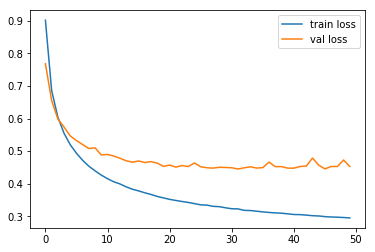

In [218]:
plt.plot(train_loss,label="train loss")
plt.plot(val_loss,label="val loss")
plt.legend()
plt.show()

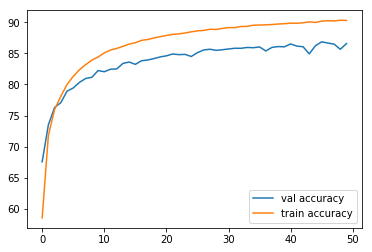

In [219]:
plt.plot(val_acc,label="val accuracy")
plt.plot(train_acc,label="train accuracy")
plt.legend()
plt.show()

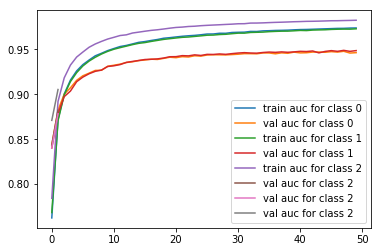

In [220]:
plt.Figure(figsize=(15,15))
plt.plot(np.array(train_auc)[:,0],label="train auc for class 0")
plt.plot(np.array(val_auc)[:,0],label="val auc for class 0")
plt.plot(np.array(train_auc)[:,1],label="train auc for class 1")
plt.plot(np.array(val_auc)[:,1],label="val auc for class 1")
plt.plot(np.array(train_auc)[:,2],label="train auc for class 2")
plt.plot(np.array(val_auc)[:2],label="val auc for class 2")
plt.legend()

plt.show()



**3.7) (5 points) ** The benefit of convolutional sequence model is that they are easier to interpret later. 
Use matplotlib and plt.imshow(), to visualize the filters of the first layer convolution that you have: 

(hint: an example, if the model is named model and the first layer of convolution is accessible via model.convnet1, the following code can give you those filters:
kernels = [k[0].data.numpy() for k in model.convnet1.weight])

**Note: It's ok if your model didn't converge at all. Just show the visualizations!**

In [253]:
def show_images(images, rows=1, titles=None):
    """Display a list of images in a single figure with matplotlib.

    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.

    rows
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None) or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None:
        titles = ['Image (%d)' % i for i in range(1, n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(rows, np.ceil(n_images / float(rows)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

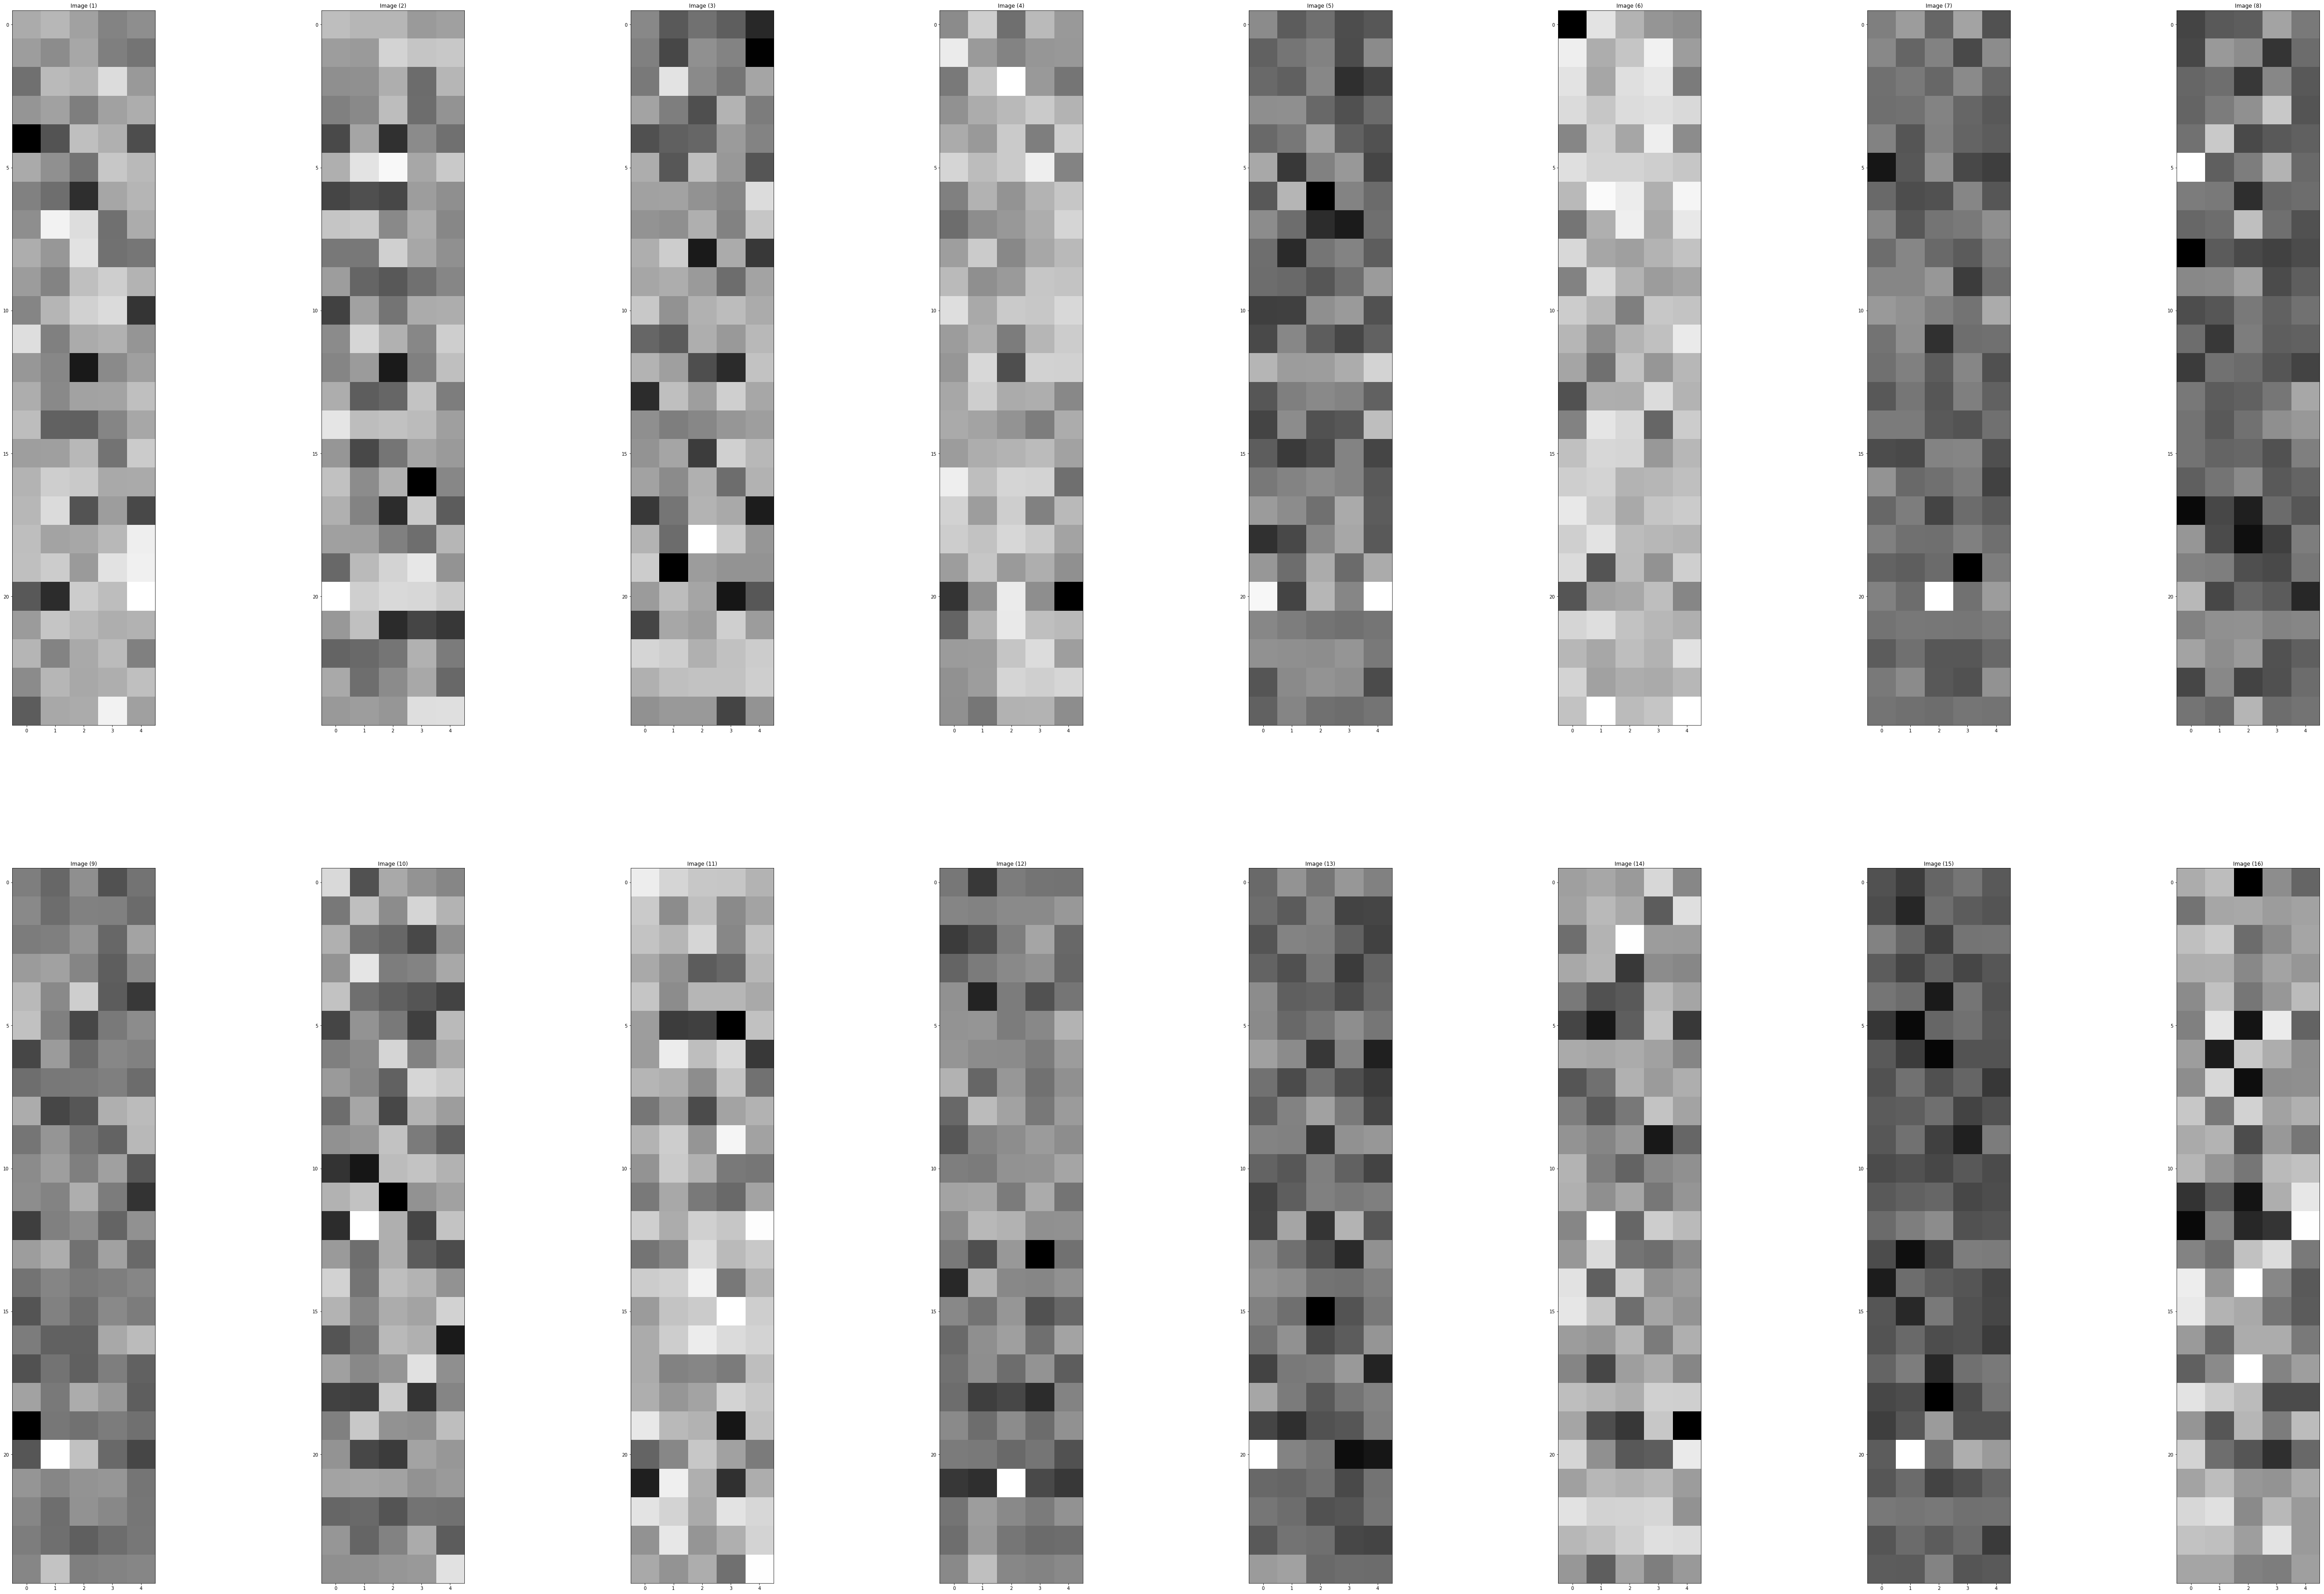

In [340]:
weights = tonumpy(model.first_layer.weight.data)
show_images([weight[0] for weight in weights], rows=2)

**3.8)(10 points)** Now, provide a second sequence classification model based on LSTMs. Build a simple LSTM model that takes as input the (25 x Len(s)) array, and ends with a softmax over 3 classees. (Hint - you probably need to *transpose* your data to a shape Len(s) x 25, to give it to LSTM. Up to you whether you will do that in advance or during the processing of the LSTM).

The rest of your experimental setting should be the same as section 3.6. 

At each epoch, compute Average NLL loss and one AUC score per class i.e. 3 AUC scores on both train and validation set.

Plot your validation and train loss over different epochs, and also print the AUCs on train and validation sets.

NOTE: At some point in your back-propagation, you may get an error which needs you to set a parameter retain_graph to be true, to solve. Advance warnings if you encounter that, and your solution will be: loss.backward(retain_graph=True)

### Couldnt get good performance as the loss increases very slowly and hence needs around 500 epochs to get to lesser loss. But the model is run for around 150 epochs and performance is demonstrated.

In [254]:
def seqstring_to_seqbinary_lstm(seqLetters):
    #
    # FILL IN YOUR FUNCTION HERE
    #
    
    indiv_letters=list(seqLetters)
    seq_one_hot=np.zeros((500,25))
    if len(indiv_letters)>500:
        indiv_letters=indiv_letters[:500]
    for i,l in enumerate(indiv_letters):
        #print(i)
        seq_one_hot[i,set_alphabet_index()[l]]=1
    return seq_one_hot




In [255]:
def one_hot_encode_shaped_lstm(df):
    final_array=[]
    for i,x in df.iterrows():
        seq=x['sequence']
        
        array_encoded=seqstring_to_seqbinary_lstm(seq)
        #reshaped_array_enc=np.reshape(array_encoded,(1,array_encoded.shape[0],array_encoded.shape[1]))
        #final_array.append(reshaped_array_enc)
        final_array.append(array_encoded)
    return np.array(final_array)

In [256]:
train_lstm=one_hot_encode_shaped_lstm(train_df)
val_lstm=one_hot_encode_shaped_lstm(val_df)
test_lstm=one_hot_encode_shaped_lstm(test_df)

In [257]:
train_lstm.shape

(70248, 500, 25)

In [270]:
def train_m_lstm(epochs,bs,train,val,model,batched_label,test_labels):
    train_aucs=[]
    val_aucs=[]


    best_val=np.inf
    rows_trn = len(train)
    acc_train=[]
    acc_val=[]
    rows_val=len(val)
    bpr_val=rows_val//bs
    batches_per_epoch = rows_trn // bs
    total_train_loss=[]
    total_val_loss=[]
    for epoch in range(epochs):
        print("epoch",epoch)
        
        pred_y_train=[]
        pred_y_val=[]

        true_train_label=[]
        true_val_label=[]



        trn_loss = []
        correct_train=0
        correct_val=0

        trn_acc = [0,0]
        order = np.arange(rows_trn)
        np.random.shuffle(order)
        for itr in range(batches_per_epoch):
            rows = order[itr*bs:(itr+1)*bs]
            if itr+1 == batches_per_epoch:
                rows = order[itr*bs:]
            x=train[rows,:,:]
            y=np.array(batched_label)[rows]
            
            true_train_label.append(y)
            
            y_pred,y_pred_proba= model(x)
            pred_y_train.append(tonumpy(y_pred_proba))
            l=loss(y_pred,tovar(y))
            true_vals=getindex(y_pred)
            correct_train += true_vals.eq(tovar(y).data.view_as(true_vals)).long().cpu().sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            trn_loss.append(tonumpy(l.data[0]))
        total_train_loss.append(np.mean(trn_loss))
        print("train loss",np.mean(trn_loss))
        val_loss=[]
        order=np.arange(rows_val)
        np.random.shuffle(order)
        for itr in range(bpr_val):
            model.eval()
            rows=order[itr*bs:(itr+1)*bs]
            if itr+1==bpr_val:
                rows=order[itr*bs:]
            x=val[rows,:,:]
            y=np.array(test_labels)[rows]
            true_val_label.append(y)
            y_pred,val_y_pred_proba=model(x)
            pred_y_val.append(tonumpy(val_y_pred_proba))
            lo=loss(y_pred,tovar(y))
            true_val_val=getindex(y_pred)
            correct_val+=true_val_val.eq(tovar(y).data.view_as(true_val_val)).long().cpu().sum()
            val_loss.append(tonumpy(lo.data[0]))
        if np.mean(val_loss)<best_val:
            best_val=np.mean(val_loss)
            best_model=model
            
        true_y_train=np.concatenate(true_train_label)
        true_y_val=np.concatenate(true_val_label)
        train_y_onehot=onehotencoding(np.array(true_y_train),3)
        val_y_onehot=onehotencoding(np.array(true_y_val),3)

        pred_y_train=np.vstack(pred_y_train)
        pred_y_val=np.vstack(pred_y_val)
        t_a=computeaucroc(train_y_onehot,pred_y_train)
        v_a=computeaucroc(val_y_onehot,pred_y_val)
        train_aucs.append(t_a)
        val_aucs.append(v_a)
        print("Train auc: ",t_a)
        print("Validation auc: ",v_a )
            
        total_val_loss.append(np.mean(val_loss))
        print("Val loss",np.mean(val_loss))
        acc_train.append(correct_train/len(batched_label)*100)
        acc_val.append(correct_val/len(test_labels)*100)
        
    return total_train_loss,total_val_loss,acc_train,acc_val,best_model,train_aucs,val_aucs,best_model

In [276]:
class lstm(nn.Module):
    def __init__(self,in_shape_x,in_shape_y):
        nn.Module.__init__(self)
        self.hidden_dim=30
        
        self.lstm=nn.LSTM(25,30,batch_first=True)
        self.fc = nn.Linear(30,3)
        self.soft=nn.Softmax()
        
    def init_hidden(self, bsz):
        """
        Initialize the hidden state values and C matrix for LSTM
        :return (hidden, c)
        """
        hidden = nn.Parameter(torch.zeros(1,bsz, self.hidden_dim).cuda())
        c = nn.Parameter(torch.zeros(1,bsz, self.hidden_dim).cuda())
        return hidden, c
        
    def forward(self,x):
        x=tovar(x).float()
        x=self.lstm(x, self.init_hidden(x.size()[0]))
        x = (x[1][0]).view(-1,30)
        x = self.fc(x)
        return x,self.soft(x)

In [279]:
USE_CUDA=1

model = cuda(lstm(train_lstm.shape[1], train_lstm.shape[2]))
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)
train_loss,val_loss,train_acc,val_acc,best_model,train_auc,val_auc,best_lstm = train_m_lstm(50,64,train_lstm,val_lstm,model,train_label,val_label)

epoch 0
train loss 1.11455151365
Train auc:  {0: 0.4997508618095981, 1: 0.50001430373196276, 2: 0.50287722769310494}
Validation auc:  {0: 0.51389678495726143, 1: 0.49266464871610222, 2: 0.5113198334536937}
Val loss 1.10824888765
epoch 1
train loss 1.10277679473
Train auc:  {0: 0.50464556200051836, 1: 0.50027291750751213, 2: 0.50186674946587184}
Validation auc:  {0: 0.52355611168072469, 1: 0.50122613944437733, 2: 0.50189636468870913}
Val loss 1.09678310597
epoch 2
train loss 1.09215675524
Train auc:  {0: 0.51159771128581921, 1: 0.50463799492599692, 2: 0.50042136131299841}
Validation auc:  {0: 0.53529463700732105, 1: 0.51324253856314395, 2: 0.48526873483581406}
Val loss 1.09051042028
epoch 3
train loss 1.08907828227
Train auc:  {0: 0.51701785161597869, 1: 0.50122234860708936, 2: 0.49968747739166419}
Validation auc:  {0: 0.54409354384435349, 1: 0.50969484942943066, 2: 0.47739164749975704}
Val loss 1.09017740243
epoch 4
train loss 1.08881003844
Train auc:  {0: 0.52431033228290114, 1: 0.505

train loss 1.08490652808
Train auc:  {0: 0.53159897621007079, 1: 0.50897091718947152, 2: 0.51246908564424687}
Validation auc:  {0: 0.53278019360441697, 1: 0.48740089833914196, 2: 0.48933173528049967}
Val loss 1.08613302512
epoch 37
train loss 1.08467739728
Train auc:  {0: 0.53211633850521067, 1: 0.50662892700727524, 2: 0.50727962817668892}
Validation auc:  {0: 0.53586803403110217, 1: 0.48186639083367883, 2: 0.4867310948306619}
Val loss 1.08600927934
epoch 38
train loss 1.08440862913
Train auc:  {0: 0.53447661699949578, 1: 0.51178334474871867, 2: 0.51130856602158503}
Validation auc:  {0: 0.53407200424042189, 1: 0.48951550061132154, 2: 0.49246436520518616}
Val loss 1.08566650691
epoch 39
train loss 1.08412605834
Train auc:  {0: 0.53554538521496342, 1: 0.51032273557772456, 2: 0.51200596085922623}
Validation auc:  {0: 0.53648156575143624, 1: 0.48533664155435902, 2: 0.48940594024473894}
Val loss 1.08543775539
epoch 40
train loss 1.08379208259
Train auc:  {0: 0.53479362325198909, 1: 0.511574

In [290]:
model1=best_lstm

loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model1.parameters(),lr=0.000005)
train_loss1,val_loss1,train_acc1,val_acc1,best_model1,train_auc1,val_auc1,best_lstm1 = train_m_lstm(50,64,train_lstm,val_lstm,model1,train_label,val_label)

epoch 0
train loss 1.06213570587
Train auc:  {0: 0.55591930328978223, 1: 0.58565508757302176, 2: 0.56321031791155907}
Validation auc:  {0: 0.56905841050931061, 1: 0.58760679003873872, 2: 0.56259229544118039}
Val loss 1.06789815295
epoch 1
train loss 1.06223216357
Train auc:  {0: 0.55808367422433791, 1: 0.58675749841235847, 2: 0.56204032982639296}
Validation auc:  {0: 0.57477576042063938, 1: 0.61208860484476435, 2: 0.56861178370970478}
Val loss 1.06195698895
epoch 2
train loss 1.08437747279
Train auc:  {0: 0.56081670081928769, 1: 0.59150448255486132, 2: 0.55809814415434134}
Validation auc:  {0: 0.58445153363553848, 1: 0.6117894886945654, 2: 0.56106996589924263}
Val loss 1.08082504746
epoch 3
train loss 1.0762970341
Train auc:  {0: 0.55844121424822246, 1: 0.59017823758249921, 2: 0.55929982718361804}
Validation auc:  {0: 0.58413435675198389, 1: 0.6112074708388624, 2: 0.56002520739563444}
Val loss 1.07422105499
epoch 4
train loss 1.09119777046
Train auc:  {0: 0.55722643640252123, 1: 0.5847

train loss 1.05851805384
Train auc:  {0: 0.56158974955482377, 1: 0.595343491753766, 2: 0.56724538899453625}
Validation auc:  {0: 0.56292322474222556, 1: 0.60150427129554451, 2: 0.57327093832392306}
Val loss 1.06496398629
epoch 37
train loss 1.05958637457
Train auc:  {0: 0.56413846289446379, 1: 0.59658452952133256, 2: 0.56473574015639727}
Validation auc:  {0: 0.58891482479530211, 1: 0.62167588200994561, 2: 0.57165128223545281}
Val loss 1.059663615
epoch 38
train loss 1.05937463143
Train auc:  {0: 0.56133236629477812, 1: 0.59470222829110431, 2: 0.56684112119775887}
Validation auc:  {0: 0.57700803986246241, 1: 0.59974187323157735, 2: 0.56371715230151576}
Val loss 1.065206053
epoch 39
train loss 1.06103725806
Train auc:  {0: 0.55673175537092445, 1: 0.58344446435109787, 2: 0.56009855352465832}
Validation auc:  {0: 0.58137704034859006, 1: 0.61058932908231067, 2: 0.56745572214796747}
Val loss 1.0597337953
epoch 40
train loss 1.05830566282
Train auc:  {0: 0.56862104565108851, 1: 0.600809076062

In [291]:
model2=best_lstm1

loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model2.parameters(),lr=0.000005)
train_loss2,val_loss2,train_acc2,val_acc2,best_model2,train_auc2,val_auc2,best_lstm2 = train_m_lstm(20,64,train_lstm,val_lstm,model2,train_label,val_label)

epoch 0
train loss 1.06215529857
Train auc:  {0: 0.55586025566658126, 1: 0.58182399837762588, 2: 0.55965979915378694}
Validation auc:  {0: 0.58229396934506283, 1: 0.61644045240404488, 2: 0.56793224001116915}
Val loss 1.05811692803
epoch 1
train loss 1.05803757058
Train auc:  {0: 0.56586134799895438, 1: 0.597163204689801, 2: 0.56503994680100977}
Validation auc:  {0: 0.57778143198833509, 1: 0.61129556587914724, 2: 0.57584020731963037}
Val loss 1.05905066288
epoch 2
train loss 1.05943300051
Train auc:  {0: 0.56059686819697907, 1: 0.58897117091390672, 2: 0.56264529691346832}
Validation auc:  {0: 0.57483286311377002, 1: 0.59930082809567375, 2: 0.56070509776431621}
Val loss 1.06424640597
epoch 3
train loss 1.06282910251
Train auc:  {0: 0.55792430969758167, 1: 0.5801571754842112, 2: 0.55559927439619561}
Validation auc:  {0: 0.58188597000906173, 1: 0.61286021962903303, 2: 0.56873919157083574}
Val loss 1.05977992554
epoch 4
train loss 1.05859113886
Train auc:  {0: 0.56670653188229836, 1: 0.5992

In [292]:
model3=best_lstm2

loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model3.parameters(),lr=0.000001)
train_loss3,val_loss3,train_acc3,val_acc3,best_model3,train_auc3,val_auc3,best_lstm3 = train_m_lstm(20,64,train_lstm,val_lstm,model3,train_label,val_label)

epoch 0
train loss 1.05707830337
Train auc:  {0: 0.56882769296436186, 1: 0.60127320925422612, 2: 0.56661870366455869}
Validation auc:  {0: 0.58948982025354346, 1: 0.62419898195166668, 2: 0.57969000562430628}
Val loss 1.05644834695
epoch 1
train loss 1.05643972768
Train auc:  {0: 0.5703017970041897, 1: 0.60526119186171723, 2: 0.56814637050757677}
Validation auc:  {0: 0.58822095160391574, 1: 0.62426599324126553, 2: 0.57301144913703006}
Val loss 1.05641739662
epoch 2
train loss 1.05640672996
Train auc:  {0: 0.5680460930514053, 1: 0.60569296638708803, 2: 0.57187422528891974}
Validation auc:  {0: 0.58995400646876672, 1: 0.62331276061114715, 2: 0.57341519259887497}
Val loss 1.05660804053
epoch 3
train loss 1.05711016779
Train auc:  {0: 0.5692292931401175, 1: 0.60565996587885285, 2: 0.57136663231807816}
Validation auc:  {0: 0.59106940845069655, 1: 0.62262681960189048, 2: 0.57527007974045263}
Val loss 1.05725395777
epoch 4
train loss 1.05718785981
Train auc:  {0: 0.57022540610799066, 1: 0.6084

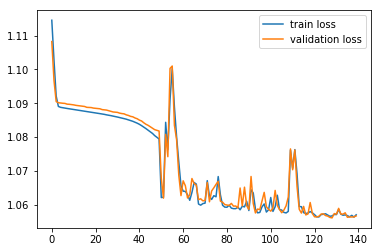

In [375]:
lstm1_train=np.concatenate([train_loss,train_loss1,train_loss2,train_loss3])
lstm1_val=np.concatenate([val_loss,val_loss1,val_loss2,val_loss3])

plt.plot(lstm1_train,label="train loss")
plt.plot(lstm1_val,label="validation loss")
plt.legend()
plt.show()

In [335]:
class lstm2(nn.Module):
    def __init__(self,in_shape_x,in_shape_y):
        nn.Module.__init__(self)
        self.hidden_dim=75
        
        self.lstm=nn.LSTM(25,75,batch_first=True,dropout=0.3,bidirectional=True)
        self.fc = nn.Linear(2*75,3)
        self.soft=nn.Softmax()
        
    def init_hidden(self, bsz):
        """
        Initialize the hidden state values and C matrix for LSTM
        :return (hidden, c)
        """
        hidden = nn.Parameter(torch.zeros(2,bsz, self.hidden_dim).cuda())
        c = nn.Parameter(torch.zeros(2,bsz, self.hidden_dim).cuda())
        return hidden, c
        
    def forward(self,x):
        x=tovar(x).float()
#         x=self.lstm(x, self.init_hidden(x.size()[0]))
#         x = (x[1][0]).view(-1,75)
#         x = self.fc(x)
        out, (last_hidden, _) = self.lstm(x, self.init_hidden(x.size()[0]))
        x=self.fc(out[:,-1,:])
        #out = F.sigmoid()
        return x,self.soft(x)

In [379]:
def train_m_lstm2(epochs,bs,train,val,model,batched_label,test_labels):
    train_aucs=[]
    val_aucs=[]


    best_val=np.inf
    rows_trn = len(train)
    acc_train=[]
    acc_val=[]
    rows_val=len(val)
    bpr_val=rows_val//bs
    batches_per_epoch = rows_trn // bs
    total_train_loss=[]
    total_val_loss=[]
    for epoch in range(epochs):
        optimizer=torch.optim.Adam(model.parameters(),lr=1.0/(50**4+6000*(25+epoch)))
        print(1.0/(50**4+6000*(25+epoch)))
        print("epoch",epoch)
        
        pred_y_train=[]
        pred_y_val=[]

        true_train_label=[]
        true_val_label=[]



        trn_loss = []
        correct_train=0
        correct_val=0

        trn_acc = [0,0]
        order = np.arange(rows_trn)
        np.random.shuffle(order)
        for itr in range(batches_per_epoch):
            rows = order[itr*bs:(itr+1)*bs]
            if itr+1 == batches_per_epoch:
                rows = order[itr*bs:]
            x=train[rows,:,:]
            y=np.array(batched_label)[rows]
            
            true_train_label.append(y)
            
            y_pred,y_pred_proba= model(x)
            pred_y_train.append(tonumpy(y_pred_proba))
            l=loss(y_pred,tovar(y))
            true_vals=getindex(y_pred)
            correct_train += true_vals.eq(tovar(y).data.view_as(true_vals)).long().cpu().sum()
            optimizer.zero_grad()
            l.backward(retain_graph=True)
            optimizer.step()
            trn_loss.append(tonumpy(l.data[0]))
        total_train_loss.append(np.mean(trn_loss))
        print("train loss",np.mean(trn_loss))
        val_loss=[]
        order=np.arange(rows_val)
        np.random.shuffle(order)
        for itr in range(bpr_val):
            model.eval()
            rows=order[itr*bs:(itr+1)*bs]
            if itr+1==bpr_val:
                rows=order[itr*bs:]
            x=val[rows,:,:]
            y=np.array(test_labels)[rows]
            true_val_label.append(y)
            y_pred,val_y_pred_proba=model(x)
            pred_y_val.append(tonumpy(val_y_pred_proba))
            lo=loss(y_pred,tovar(y))
            true_val_val=getindex(y_pred)
            correct_val+=true_val_val.eq(tovar(y).data.view_as(true_val_val)).long().cpu().sum()
            val_loss.append(tonumpy(lo.data[0]))
        if np.mean(val_loss)<best_val:
            best_val=np.mean(val_loss)
            best_model=model
            
        true_y_train=np.concatenate(true_train_label)
        true_y_val=np.concatenate(true_val_label)
        train_y_onehot=onehotencoding(np.array(true_y_train),3)
        val_y_onehot=onehotencoding(np.array(true_y_val),3)

        pred_y_train=np.vstack(pred_y_train)
        pred_y_val=np.vstack(pred_y_val)
        t_a=computeaucroc(train_y_onehot,pred_y_train)
        v_a=computeaucroc(val_y_onehot,pred_y_val)
        train_aucs.append(t_a)
        val_aucs.append(v_a)
        print("Train auc: ",t_a)
        print("Validation auc: ",v_a )
            
        total_val_loss.append(np.mean(val_loss))
        print("Val loss",np.mean(val_loss))
        acc_train.append(correct_train/len(batched_label)*100)
        acc_val.append(correct_val/len(test_labels)*100)
        
    return total_train_loss,total_val_loss,acc_train,acc_val,best_model,train_aucs,val_aucs,best_model

In [339]:
USE_CUDA=1

mode21 = cuda(lstm2(train_lstm.shape[1], train_lstm.shape[2]))
loss=nn.CrossEntropyLoss()
#optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)
train_loss21,val_loss21,train_acc21,val_acc21,best_model21,train_auc21,val_auc21,best_lstm21 = train_m_lstm2(50,64,train_lstm,val_lstm,mode21,train_label,val_label)

1e-05
epoch 0
train loss 1.09316617854
Train auc:  {0: 0.50645098897243712, 1: 0.50433039381959566, 2: 0.50559906790887676}
Validation auc:  {0: 0.51900868859789984, 1: 0.50380249957197532, 2: 0.50336430651173614}
Val loss 1.09159053091
9.900990099009901e-06
epoch 1
train loss 1.08972024113
Train auc:  {0: 0.5136106098890203, 1: 0.50108024676092489, 2: 0.50298577323979055}
Validation auc:  {0: 0.52501792451332618, 1: 0.49782017656799693, 2: 0.50618231353156973}
Val loss 1.09054103616
9.803921568627451e-06
epoch 2
train loss 1.08903809537
Train auc:  {0: 0.51709724784809352, 1: 0.50531336445644104, 2: 0.51375068933250212}
Validation auc:  {0: 0.53636242090590147, 1: 0.50890651146700516, 2: 0.50945347986790779}
Val loss 1.09036196421
9.70873786407767e-06
epoch 3
train loss 1.08884486059
Train auc:  {0: 0.51950526829056032, 1: 0.5032177291587393, 2: 0.51181452231648406}
Validation auc:  {0: 0.53044905713905444, 1: 0.51448534763478715, 2: 0.5172643883118484}
Val loss 1.09030121614
9.615384

train loss 1.08057319482
Train auc:  {0: 0.5329278070734047, 1: 0.51596883368655799, 2: 0.527073883622873}
Validation auc:  {0: 0.53323109627809151, 1: 0.50601132081129907, 2: 0.51443437509555368}
Val loss 1.08232198709
7.462686567164179e-06
epoch 34
train loss 1.08024895745
Train auc:  {0: 0.53424134813674062, 1: 0.52125626339995401, 2: 0.53039405976102461}
Validation auc:  {0: 0.53533897766404503, 1: 0.5044526571110457, 2: 0.51814919145463545}
Val loss 1.08221037159
7.4074074074074075e-06
epoch 35
train loss 1.07982413597
Train auc:  {0: 0.53491564971585281, 1: 0.52097360656017178, 2: 0.52525644067707467}
Validation auc:  {0: 0.53456555161913866, 1: 0.50863071672971127, 2: 0.52076588404871837}
Val loss 1.08198090906
7.3529411764705884e-06
epoch 36
train loss 1.07971618386
Train auc:  {0: 0.53243150480432566, 1: 0.52064300617652726, 2: 0.52691601191403847}
Validation auc:  {0: 0.52937713087849081, 1: 0.50778484216027964, 2: 0.51470515519746662}
Val loss 1.08160053475
7.299270072992701

In [348]:
train_loss22,val_loss22,train_acc22,val_acc22,best_model22,train_auc22,val_auc22,best_lstm22 = train_m_lstm2(20,64,train_lstm,val_lstm,best_lstm21,train_label,val_label)

6.25e-06
epoch 0
train loss 1.07359661856
Train auc:  {0: 0.54734866724056452, 1: 0.55358744862248366, 2: 0.53780227674931136}
Validation auc:  {0: 0.54921503809175309, 1: 0.55138344136078021, 2: 0.53676097691963198}
Val loss 1.07458473803
6.134969325153374e-06
epoch 1
train loss 1.07234015558
Train auc:  {0: 0.55089941871758275, 1: 0.55686552195454375, 2: 0.54018115306810666}
Validation auc:  {0: 0.55289543979622535, 1: 0.53770282973616701, 2: 0.52706119010685204}
Val loss 1.07184619904
6.024096385542168e-06
epoch 2
train loss 1.07301310262
Train auc:  {0: 0.55031270364315832, 1: 0.55420192098828314, 2: 0.53679853329872207}
Validation auc:  {0: 0.55713776541135029, 1: 0.54774727850548344, 2: 0.53182488112900095}
Val loss 1.07314075574
5.917159763313609e-06
epoch 3
train loss 1.07151412828
Train auc:  {0: 0.55043571881624431, 1: 0.55600743723658275, 2: 0.53959632451000994}
Validation auc:  {0: 0.54947618921149521, 1: 0.53149078871128852, 2: 0.52258982978267621}
Val loss 1.07794445508
5

In [352]:
train_loss23,val_loss22,train_acc23,val_acc23,best_model23,train_auc23,val_auc23,best_lstm23 = train_m_lstm2(20,64,train_lstm,val_lstm,best_lstm22,train_label,val_label)

3.3333333333333333e-06
epoch 0
train loss 1.06583498175
Train auc:  {0: 0.56078388256998246, 1: 0.57623611201956493, 2: 0.54978534820688263}
Validation auc:  {0: 0.55689176338000723, 1: 0.55590953586831016, 2: 0.52687376881633396}
Val loss 1.06845909161
3.2786885245901638e-06
epoch 1
train loss 1.06840889896
Train auc:  {0: 0.55879172985446046, 1: 0.58562235150210684, 2: 0.56334906805987517}
Validation auc:  {0: 0.5602816909601569, 1: 0.57030961135976577, 2: 0.54630784270380106}
Val loss 1.06816731348
3.225806451612903e-06
epoch 2
train loss 1.06702292797
Train auc:  {0: 0.5653975970796532, 1: 0.57581279694983556, 2: 0.54774431902439069}
Validation auc:  {0: 0.55447763551908946, 1: 0.56251705404616015, 2: 0.5361474190311063}
Val loss 1.06695641345
3.1746031746031746e-06
epoch 3
train loss 1.0660898523
Train auc:  {0: 0.56092339213385323, 1: 0.57172065438595099, 2: 0.5456482385057877}
Validation auc:  {0: 0.56953233148718807, 1: 0.55371190294008166, 2: 0.53551460559065378}
Val loss 1.06

In [367]:
train_loss24,val_loss24,train_acc24,val_acc24,best_model4,train_auc24,val_auc24,best_lstm24 = train_m_lstm2(20,64,train_lstm,val_lstm,best_lstm23,train_label,val_label)

5.7142857142857145e-06
epoch 0
train loss 1.05758333021
Train auc:  {0: 0.56457043670881035, 1: 0.57293701909381389, 2: 0.54289965265788442}
Validation auc:  {0: 0.57403408259121869, 1: 0.55343241701639234, 2: 0.52835200542623906}
Val loss 1.05774689766
5.617977528089888e-06
epoch 1
train loss 1.05633061206
Train auc:  {0: 0.56657792173929922, 1: 0.57395744124786408, 2: 0.54394083292231066}
Validation auc:  {0: 0.55423516106724469, 1: 0.5341391212360036, 2: 0.52395193628178127}
Val loss 1.06963505582
5.524861878453038e-06
epoch 2
train loss 1.05569580129
Train auc:  {0: 0.5674761657210512, 1: 0.57533477762594598, 2: 0.54411051492010343}
Validation auc:  {0: 0.56598236966645254, 1: 0.56467631776119331, 2: 0.52770023922170928}
Val loss 1.05635532614
5.4347826086956525e-06
epoch 3
train loss 1.05979545962
Train auc:  {0: 0.56089853268673451, 1: 0.56608943838638659, 2: 0.54151934213857134}
Validation auc:  {0: 0.57348005757552434, 1: 0.55317284054885685, 2: 0.52654406795422948}
Val loss 1.

In [369]:
train_loss25,val_loss25,train_acc25,val_acc25,best_model5,train_auc25,val_auc25,best_lstm25 = train_m_lstm2(50,64,train_lstm,val_lstm,best_lstm24,train_label,val_label)

5.7142857142857145e-06
epoch 0
train loss 1.05476923014
Train auc:  {0: 0.56629235388917465, 1: 0.57542041723864712, 2: 0.54817271170937332}
Validation auc:  {0: 0.57675918863229358, 1: 0.56209290804133938, 2: 0.52952784035100775}
Val loss 1.05759606459
5.617977528089888e-06
epoch 1
train loss 1.05186745587
Train auc:  {0: 0.57262052089544024, 1: 0.58323852902828777, 2: 0.5510407857042342}
Validation auc:  {0: 0.58673790545625648, 1: 0.57557160985758671, 2: 0.53633371254659123}
Val loss 1.05125381996
5.524861878453038e-06
epoch 2
train loss 1.05382434129
Train auc:  {0: 0.56714439779895209, 1: 0.57714228582768945, 2: 0.55106056625638644}
Validation auc:  {0: 0.57681415866618424, 1: 0.54979084552113344, 2: 0.53008659363880117}
Val loss 1.0579471206
5.4347826086956525e-06
epoch 3
train loss 1.05181586726
Train auc:  {0: 0.57079723999850751, 1: 0.5813524486714321, 2: 0.54840600702399633}
Validation auc:  {0: 0.56200223394147442, 1: 0.57281292807243267, 2: 0.53736934353242172}
Val loss 1.0

train loss 1.04825951065
Train auc:  {0: 0.57350957219612941, 1: 0.58402868424129162, 2: 0.5533827869725525}
Validation auc:  {0: 0.57295898490101005, 1: 0.56300526221652647, 2: 0.52865556999224628}
Val loss 1.05019430837
3.6101083032490977e-06
epoch 34
train loss 1.04853104757
Train auc:  {0: 0.57144623477854983, 1: 0.58144329198749067, 2: 0.55130498586048016}
Validation auc:  {0: 0.57542382595709674, 1: 0.57662069475701583, 2: 0.53295084382322089}
Val loss 1.04757114453
3.5714285714285714e-06
epoch 35
train loss 1.04896631481
Train auc:  {0: 0.57349749983450349, 1: 0.58247665168453389, 2: 0.54928824754173167}
Validation auc:  {0: 0.57805953838501711, 1: 0.58950622483203752, 2: 0.55130578181560441}
Val loss 1.06469366061
3.5335689045936394e-06
epoch 36
train loss 1.04814636718
Train auc:  {0: 0.57436279754965491, 1: 0.5868266307897968, 2: 0.55269856558391051}
Validation auc:  {0: 0.5736062914990897, 1: 0.57292155605424178, 2: 0.5357291154231143}
Val loss 1.04638409827
3.49650349650349

In [384]:
# train_loss26,val_loss26,train_acc26,val_acc26,best_model6,train_auc26,val_auc26,best_lstm26 = train_m_lstm2(20,64,train_lstm,val_lstm,best_lstm25,train_label,val_label)

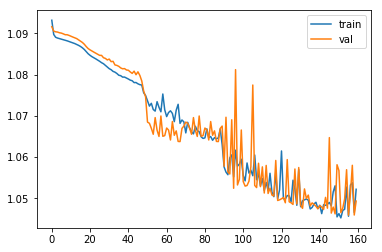

In [382]:
lstm_train_loss=np.concatenate([train_loss21,train_loss22,train_loss23,train_loss24,train_loss25])
lstm_val_loss=np.concatenate([val_loss21,val_loss22,val_loss22,val_loss24,val_loss25])


plt.plot(lstm_train_loss,label="train")
plt.plot(lstm_val_loss,label="val")
plt.legend()
plt.show()

In [383]:
import pickle
pickle.dump(best_lstm26,open("last_lstm_model2",'wb'))

**3.9) (5 points)** What are some other architectures that you could be using in future work? List a few and in a few sentences discuss why they might be a good fit for this task. 

1>Rather than directly using the LSTM, we could use couple of convolutions before and feed the learned weights to the model as it would incorporate sufficient non linearity and hence may be better prediction.

2> the first LSTM that I have made use is just normal LSTM, and the second one is bidirectional LSTM. we can observe that bidirectional LSTM is leading to qrick loss decrese when compared to normal LSTM. Hence, use of bidirectional lstm could improv the performance as model learns the sequence from front aswell as back.

3> CNN is also performing well enough on the data. Hence one could try using deeper CNN with sufficient regularization like dropout, batch normalization

**3.10)(5 points)** What are some other fine-tunning/regularizations/etc. that you could do in the future work, to improve the scores?

As, we can see from above, the loss is decreasing very slowly. Hence first thing to do would be to run the model for more epochs.

Also, I am already baby sitting the learning rate and Annealing the learning rate.

The other thing to do is - use the dropout probability as hyper parameter and baby sit it accordingly.

Also, the convolution model was very simple - without regularization and drop outs. Hence, first step would be to add dropout and other regularization methods